#Tratamento de dados

Importação das bibliotecas que serão utilizadas no tratamento dos dados

In [1]:
# Manipulação e tratamento de dados em dataframe
import pandas as pd

# Visualização de dados para análise exploratória
import seaborn as srn

# Calculos estatísticos
import statistics as sts

Importação e carregamento de dados

Será feito o carregamento do arquivo Churn.csv, que é uma tabela com dados de uma instituição financeiro com a finalidade de fazer uma análise de rotatividade de clientes, através da função pd.read_csv() do módulo Pandas

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# pd.read_csv()
dataset = pd.read_csv('Churn.csv', sep=';')

In [3]:
# Informação do dataframe | .info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [4]:
# Visualização dos cinco primeiros registros | .head()
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
# Visualização dos cinco últimos registros | .tail()
dataset.tail()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


Os nomes das colunas estão escritos de maneira codificada, portanto será criada uma lista com novos nomes para uma melhor compreensão dos dados

In [6]:
new_columns = ["Id",
               "Score",
               "Estado",
               "Genero",
               "Idade",
               "Patrimonio",
               "Saldo",
               "Produtos",
               "TemCartCredito",
               "Ativo",
               "Salario",
               "Saiu"]

In [7]:
# definindo os nomes do dataframe a partir da lista acima | dataframe.columns
dataset.columns = new_columns

In [8]:
# Visualização dos cinco primeiros registros | .head()
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Análise exploratória

Podemos utilizar algumas técnicas para explorar os dados, as principais são as visuais (gráficos) e os resumos (agrupamentos e relatórios estatísticos).

Outro ponto importante é a distinção entre os dados categórios e dados numéricos.

- Categóricos: geralmente contamos esses dados e daí se faz uma sumarização;
- Estatístico: geralmente registros estatísticos.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


##Análise dos dados categóricos

In [10]:
dataset

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


Coluna Estado

In [11]:
# verificando a quantidade de registros por estados
explorer = dataset.groupby(by = ['Estado']).size()
explorer.sort_values(ascending = False)

Estado
RS    478
SC    258
PR    257
SP      4
RP      1
TD      1
dtype: int64

Na tabela, só deveria ter estados da região sul brasileira, nota-se que tem o estado de São Paulo (SP) e dois outros inexistentes (RP, TD)

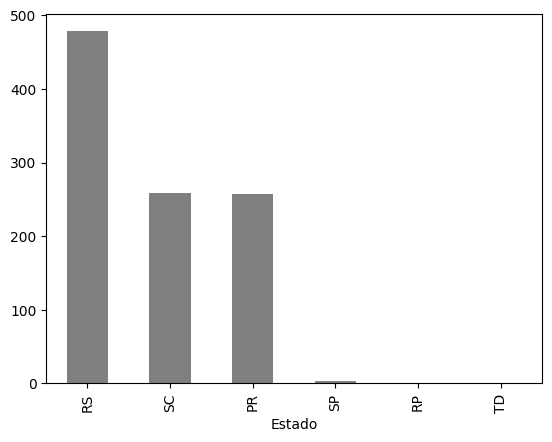

In [12]:
# visualizando a quantidade de registros por estado no gráfico de barras
explorer.sort_values(ascending = False).plot.bar(color = 'gray');

Coluna Gereno

In [13]:
# verificando a quantidade de registros por estados
dataset.groupby(by = ['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Apesar de significar a mesma coisa, as colunas estão nomeadas de 5 formas diferentes.

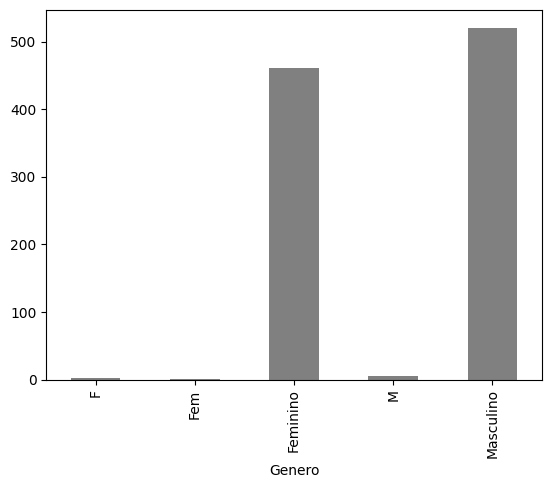

In [14]:
# visualizando a quantidade de registros por gênero no gráfico de barras
dataset.groupby(by = ['Genero']).size().plot.bar(color = 'gray');

## Análise dos dados numéricos

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


Coluna Score

In [16]:
# dados estatísticos da coluna Score | pandas.DataFrame.describe
dataset.Score.describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

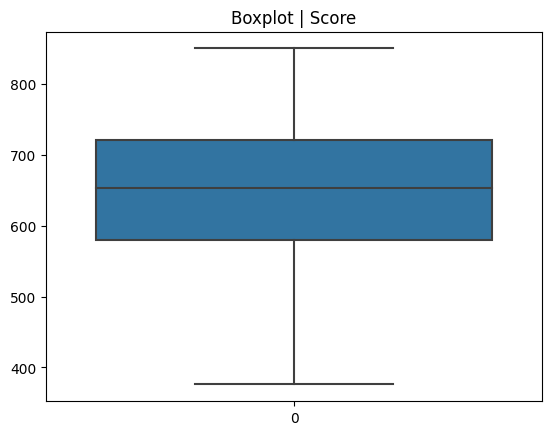

In [17]:
# Boxplot
srn.boxplot(dataset['Score']).set_title('Boxplot | Score');

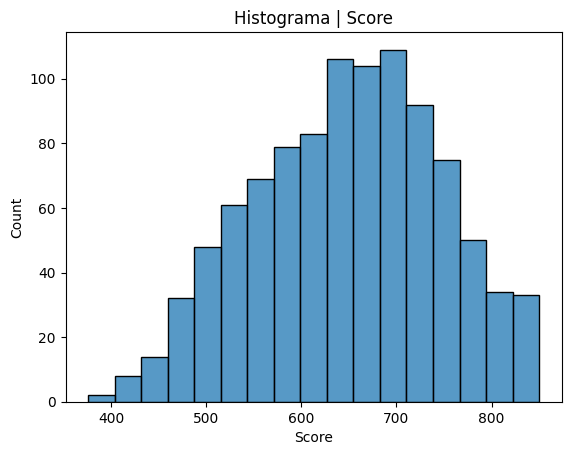

In [18]:
srn.histplot(dataset['Score']).set_title('Histograma | Score');

Coluna idade

In [19]:
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Pode-se verificar que há alguns dados inconsistentes nas idades, pois tem idade negativa (-20) e idade com valor muito alto (140)

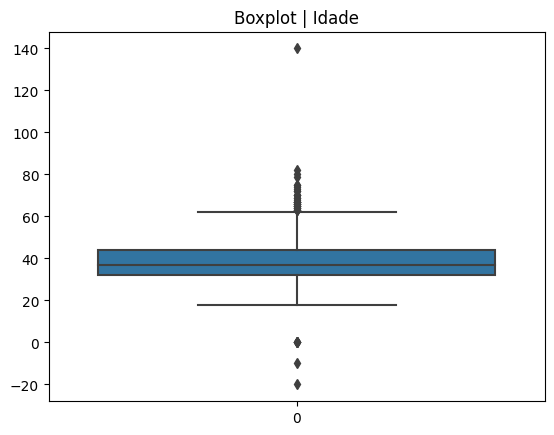

In [20]:
srn.boxplot(dataset.Idade).set_title('Boxplot | Idade');

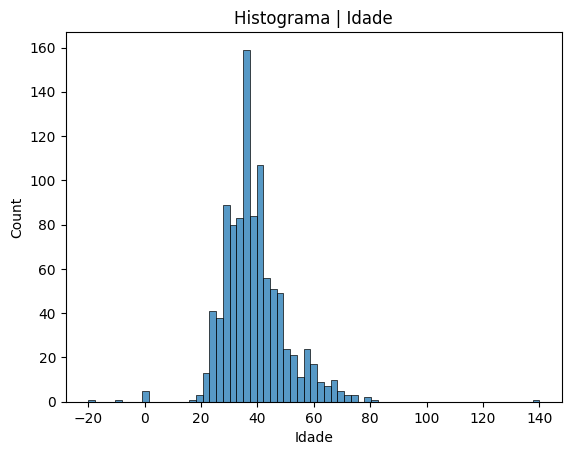

In [21]:
srn.histplot(dataset.Idade).set_title('Histograma | Idade');

Coluna Saldo

In [22]:
dataset.Saldo.describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

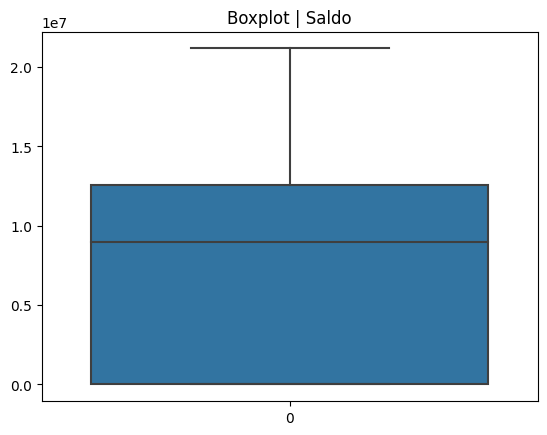

In [23]:
srn.boxplot(dataset.Saldo).set_title('Boxplot | Saldo');

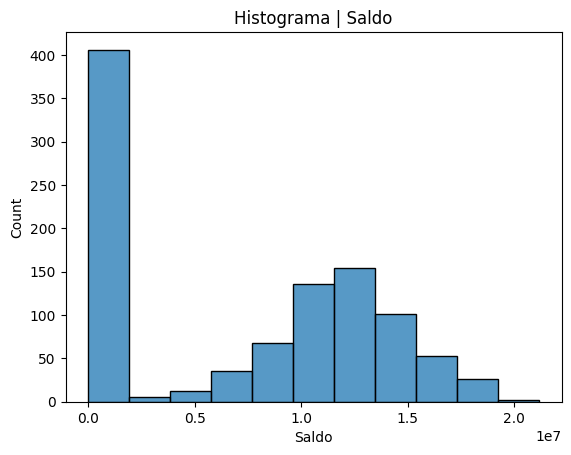

In [24]:
srn.histplot(dataset.Saldo).set_title('Histograma | Saldo');

Coluna Salario

In [25]:
round(dataset.Salario,0).describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

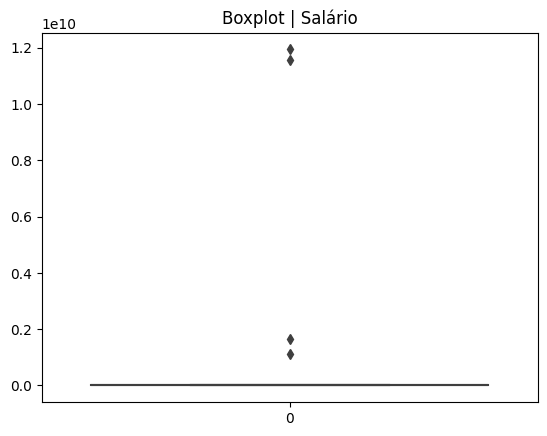

In [26]:
srn.boxplot(dataset.Salario).set_title('Boxplot | Salário');

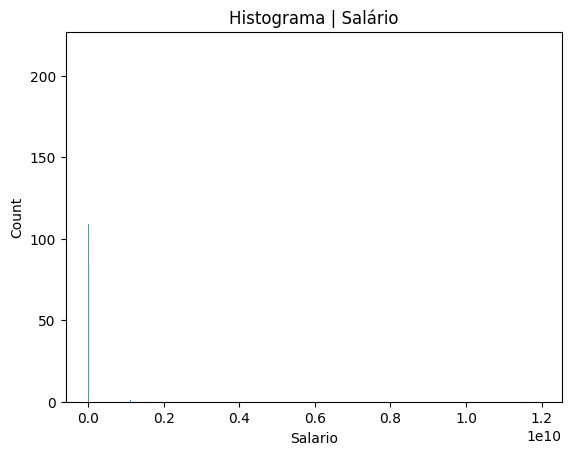

In [27]:
srn.histplot(dataset.Salario).set_title('Histograma | Salário');

#Transformação dos dados

In [28]:
# insnull - verifica os valores nulos por coluna
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Nas colunas Genero e Salario têm, respectivamente, 8 e 7 valores nulos

- Coluna Salario

In [29]:
# descrição estatítisca da coluna salario
dataset.Salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Como os dados da coluna Salario são numéricos, vamos usar a mediana dos salários para substituir os valores nulos da coluna

In [30]:
# calculando a mediana da coluna Salario | sts.median()
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

70518.0

In [31]:
# substituindo valores nulos pela variável mediana_salario | Pandas.DataFrame.fillna()
dataset['Salario'].fillna(mediana_salario, inplace = True) # inplace = True para a substituição ser definitiva

In [32]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

<p>Coluna Salario tratada, sem nenhum valor nulo.<p> Agora falta a coluna Genero. Como é uma coluna com dados categóricos, vamos substituir os valores pela moda.

- Coluna Genero

In [33]:
# retornando a moda da coluna Genero | statistcs.mode()
sts.mode(dataset['Genero'])

'Masculino'

In [34]:
moda_genero = sts.mode(dataset['Genero'])
moda_genero

'Masculino'

In [35]:
dataset['Genero'].fillna(moda_genero, inplace = True)

In [36]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

<p>Mais um problema corrigido, agora não temos nenhum dado nulo.<p> Porém falta acertar os tipos diferentes de categoria na coluna Genero

In [37]:
# valores únicos na coluna gênero | Pandas.DataFrame.unique()
dataset.Genero.unique()

array(['Feminino', 'Masculino', 'M', 'F', 'Fem'], dtype=object)

Note que temos 5 valores distintos. Temos que transformar 'M' em 'Masculino'; 'F' e 'Fem' em 'Feminino'

In [38]:
# filtrando os registros a partir da coluna Genero que contém o valor 'M' | Pandas.DataFrame.loc*
dataset.loc[dataset.Genero == 'M']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
6,7,822,RS,M,50,7,0,2,1,1,100628.0,0
15,16,616,PR,M,45,3,14312941,2,0,1,6432726.0,0
20,21,732,RS,M,41,8,0,2,1,1,17088617.0,0
119,121,699,PR,M,34,4,18517381,2,1,0,12083448.0,0
958,960,531,SC,M,27,8,13257625,1,0,0,722292.0,0
973,975,750,SC,M,38,7,9725741,2,0,1,17988304.0,0


*property DataFrame.loc

Acesse um grupo de linhas e colunas por rótulo(s) ou uma matriz booleana

In [39]:
# substituindo o valor 'M' por 'Masculino'
dataset.loc[dataset.Genero == 'M', 'Genero'] = 'Masculino'

In [40]:
dataset.loc[dataset.Genero == 'M']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [41]:
# filtrando os registros a partir da coluna Genero que contém o valor 'Fem' ou 'F' | Pandas.DataFrame.loc
dataset.loc[(dataset.Genero == 'Fem') | (dataset.Genero == 'F')]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
131,133,795,PR,F,33,9,13086243,1,1,1,11493521.0,0
141,143,663,RS,Fem,34,7,0,2,1,1,18042724.0,0
988,990,659,SC,F,31,7,14962088,2,1,1,10453351.0,0


In [42]:
# outra forma | Pandas.DataFrame.isin()*
dataset.loc[dataset.Genero.isin(['Fem', 'F'])]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
131,133,795,PR,F,33,9,13086243,1,1,1,11493521.0,0
141,143,663,RS,Fem,34,7,0,2,1,1,18042724.0,0
988,990,659,SC,F,31,7,14962088,2,1,1,10453351.0,0


<p>* Pandas.DataFrame.isin()<p> Verifica se cada elemento no DataFrame está contido em valores passados dentro do parâmetro.

In [43]:
# substituindo os valores 'Fem' e 'F' por 'Masculino'
dataset.loc[dataset.Genero.isin(['Fem', 'F']), 'Genero'] = 'Feminino'

In [44]:
dataset.loc[dataset.Genero.isin(['Fem', 'F'])]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [45]:
dataset.Genero.unique()

array(['Feminino', 'Masculino'], dtype=object)

- Coluna Idade

In [46]:
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Como foi dito, há alguns dados inconsistentes nas idades, pois tem idade negativa (-20) e idade com valor muito alto (140)

In [47]:
# filtrando registros onde a idade seja menor que 0 ou maior que 120
dataset.loc[(dataset.Idade < 0) | (dataset.Idade > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [48]:
# calculando a mediana das idades
mediana_idade = sts.median(dataset.Idade)
mediana_idade

37

In [49]:
# substituindo as idades negativas e maiores de 120 pela mediana das idades
dataset.loc[(dataset.Idade < 0) | (dataset.Idade > 120), 'Idade'] = mediana_idade

In [50]:
# verificando se a alteração foi feita
dataset.loc[(dataset.Idade < 0) | (dataset.Idade > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


 - Verificando se há dados (linhas) duplicadas

In [51]:
#dados duplicados pelo ID | Pandas.DataFrame.duplicated
# foi definido o parâmetro keep=False para trazer o primeiro registro que deriva a duplicação
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [52]:
# excluindo a linhas duplicada | Pandas.DataFrame.drop_duplicates
# parâmetro keep='first' para manter a primeira linha duplicada
# parâmetro inplace=True para remover no DataFrame atual
dataset.drop_duplicates(subset=['Id'], keep='first', inplace=True)

 - Coluna Estado

In [53]:
# verificando os estados fora de contexto
dataset.Estado.value_counts()

RS    477
SC    258
PR    257
SP      4
RP      1
TD      1
Name: Estado, dtype: int64

In [55]:
dataset.groupby(by=['Estado']).size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

O values_counts() e o size() é semelhante ao COUNT do SQL

Como a MODA dos estados é Rio Grande do Sul (RS), vamos substituir as quantidades dos estados fora de domínio para RS

In [56]:
dataset.loc[dataset.Estado.isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

In [58]:
# verificando os dados da colunas Estado novamente
dataset.Estado.value_counts()

RS    483
SC    258
PR    257
Name: Estado, dtype: int64

- Coluna Salario

In [60]:
dataset.Salario.describe()

count    9.980000e+02
mean     3.505879e+07
std      5.289889e+08
min      9.677000e+03
25%      2.849010e+06
50%      8.637196e+06
75%      1.401381e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [61]:
sts.stdev(dataset.Salario)

528988918.4679201

In [66]:
# sts.stdev() Retorna o desvio padrão amostral (a raiz quadrada da variância amostral)
desv = sts.stdev(dataset.Salario)

In [65]:
# os salários que forem iguais ou maiores que 2 desvio padrão serão considerados outliers
# e vão ser substituídos pela mediana
dataset.loc[dataset.Salario >= desv * 2]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [67]:
mediana_salario = sts.median(dataset.Salario)

In [69]:
dataset.loc[dataset.Salario >= 2 * desv, 'Salario'] = mediana_salario

In [70]:
# Verificando se a substituição foi feita
dataset.loc[dataset.Salario >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [71]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [73]:
dataset.shape

(998, 12)